Final portfolio value: 911,237.48€
Total return: -8.88%
Annualized return: -4.44%
Annualized volatility: 54.89%
Maximum drawdown: 67.08%
Sharpe Ratio: 0.10


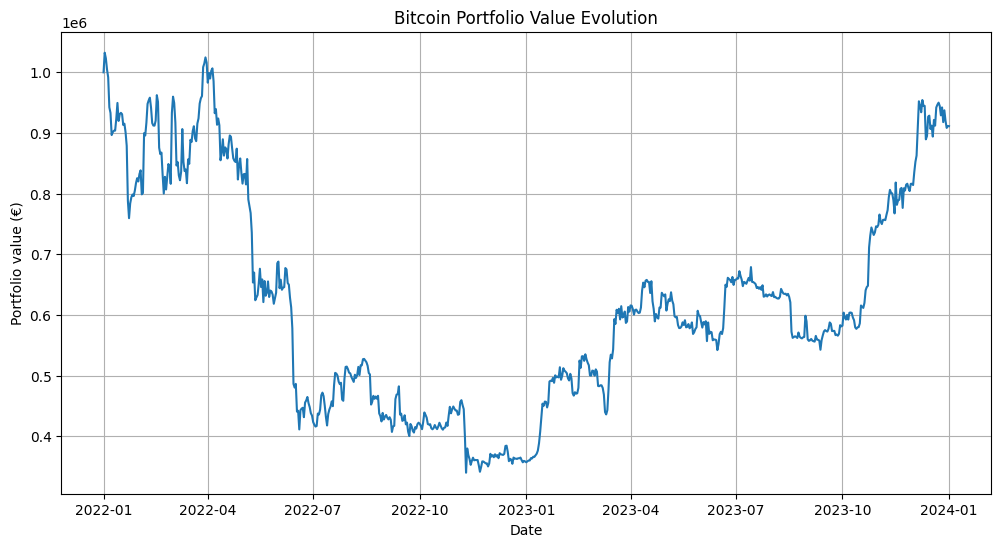

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("_data.csv")

#Backtest period
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df = df.loc['2022-01-01':'2024-01-01']

#daily returns only for Bitcoin
bitcoin_prices = df['bitcoin']
initial_btc_price = bitcoin_prices.iloc[0]
daily_returns = bitcoin_prices.pct_change().dropna()


initial_portfolio_value = 1000000

#Calculation of the evolution of the portfolio value
btc_quantity = initial_portfolio_value / initial_btc_price
portfolio_values = bitcoin_prices * btc_quantity

#Calculation of maximum drawdown
cummax = portfolio_values.cummax()
drawdown = (cummax - portfolio_values) / cummax
max_drawdown = drawdown.max()

#Calculation of mean daily return
mean_daily_return = daily_returns.mean()

T = len(daily_returns)

#Calculation of performance metrics
annualized_return = (365 / T) * (bitcoin_prices.iloc[-1] - initial_btc_price) / initial_btc_price
annualized_volatility = np.sqrt(365) * np.std(daily_returns, ddof=1)
sharpe_ratio = (mean_daily_return*365 - 0.05) / annualized_volatility


print(f"Final portfolio value: {portfolio_values.iloc[-1]:,.2f}€")
print(f"Total return: {(portfolio_values.iloc[-1] / initial_portfolio_value - 1):.2%}")
print(f"Annualized return: {annualized_return:.2%}")
print(f"Annualized volatility: {annualized_volatility:.2%}")
print(f"Maximum drawdown: {max_drawdown:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

#Plot portfolio evolution
plt.figure(figsize=(12, 6))
plt.plot(portfolio_values)
plt.title('Bitcoin Portfolio Value Evolution')
plt.xlabel('Date')
plt.ylabel('Portfolio value (€)')
plt.grid(True)
plt.show()